This script contains the following:
1. Importing your libraries and data
2. Time series analysis: decomposition
3. Testing for stationarity


1. Importing Libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# Import data- totals with percent changes
df_state = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/totals.pkl')
df_state

,State,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean,STI Rates
0,Alabama,1996,21949.0,4331102.0,0.000000,0.000000,506.776335,29956.526316,No Change
1,Alabama,1997,21145.0,4367935.0,0.008504,-0.036630,484.096032,29956.526316,Decreasing
2,Alabama,1998,23076.0,4404701.0,0.008417,0.091322,523.894811,29956.526316,Increasing
3,Alabama,1999,23465.0,4430141.0,0.005776,0.016857,529.667114,29956.526316,Increasing
4,Alabama,2000,27509.0,4451975.0,0.004929,0.172342,617.905536,29956.526316,Increasing
...,...,...,...,...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563,-1.000000,0.000000,825.684211,Decreasing
965,Wyoming,2011,0.0,568158.0,0.008041,0.000000,0.000000,825.684211,No Change
966,Wyoming,2012,2150.0,576412.0,0.014528,0.000000,372.997092,825.684211,No Change
967,Wyoming,2013,2072.0,523588.0,-0.091643,-0.036279,395.730995,825.684211,Decreasing


In [3]:
#Group by year and compute the sum of each column
df = df_state.groupby('Year').sum()
df.reset_index(inplace=True)
df.head(5)

,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean
0,1996,825001.0,257762659.0,0.000000,0.000000,14157.449140,1.346031e+06
1,1997,868580.0,260819180.0,0.343122,0.293763,15194.850740,1.346031e+06
2,1998,969033.0,264893931.0,0.651391,5.331911,17527.351724,1.346031e+06
3,1999,1024577.0,267989044.0,0.420986,-0.956650,17518.404846,1.346031e+06
4,2000,1069448.0,281969168.0,1.823547,-0.451043,17162.799023,1.346031e+06


In [4]:
#drop non-numerical columns
df.drop(['Population Percent Change', 'STD Cases Percent Change','Rate per 100K','Population','STD Cases Mean'], axis=1, inplace = True)
df

,Year,STD Cases
0,1996,825001.0
1,1997,868580.0
2,1998,969033.0
3,1999,1024577.0
4,2000,1069448.0
5,2001,1144665.0
6,2002,1181341.0
7,2003,1216084.0
8,2004,1262818.0
9,2005,1323502.0


In [5]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year
df.set_index('Year', inplace=True)

In [6]:
# Convert Year column to datetime index and set it as the index of the dataframe
df.index = pd.to_datetime(df.index, format='%Y')
df.index.name = 'Year'
df.index

DatetimeIndex(['1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)

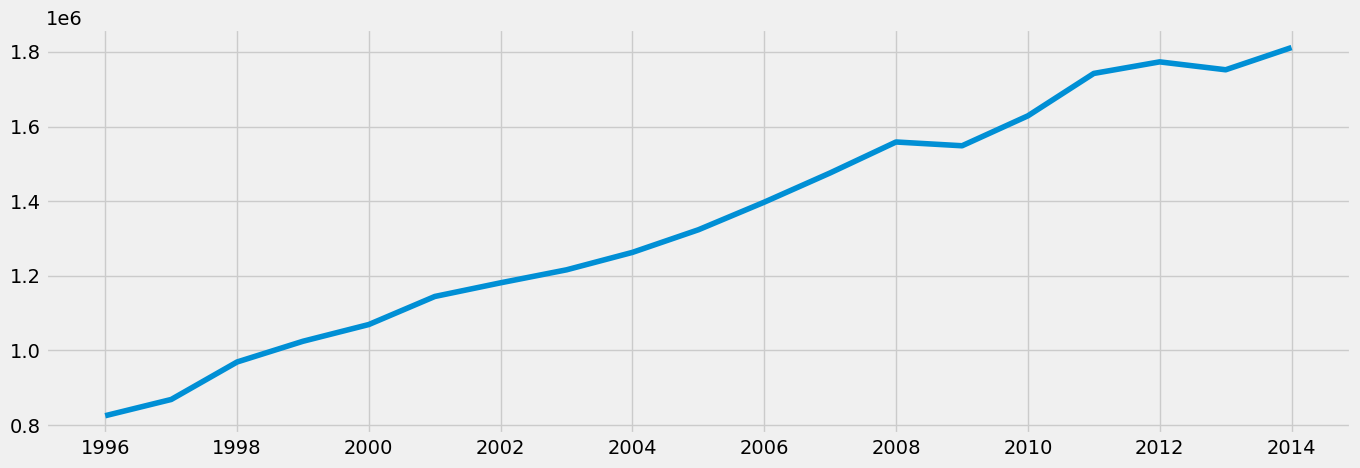

In [7]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

2.Time-series analysis: decomposition

In [8]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

In [9]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

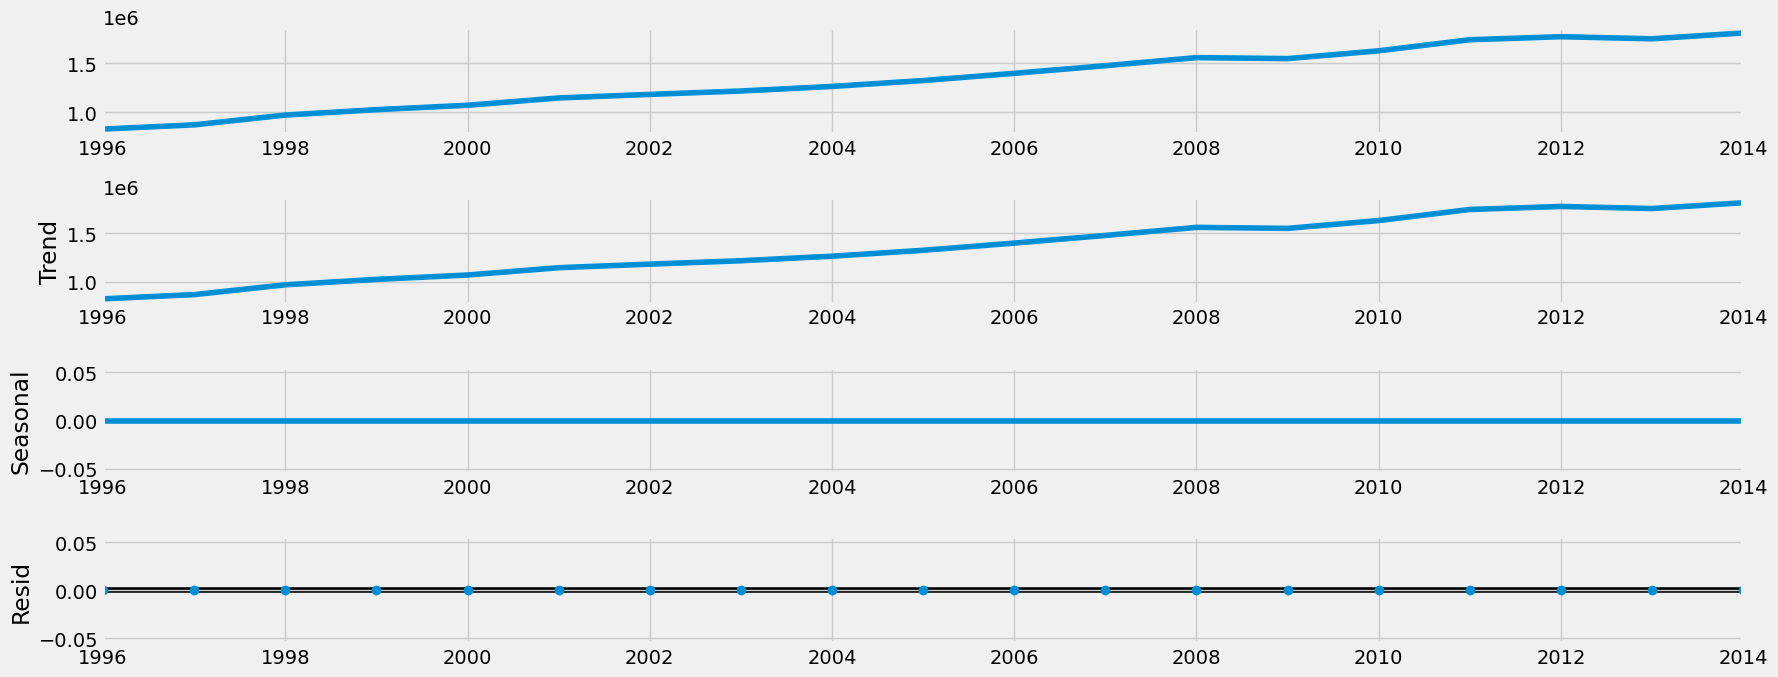

In [10]:
# Plot the separate components

decomposition.plot()
plt.show()

#There appears to be very little noise.  It may be due to the limited data sums over the years, there were only 18 points.

3. Testing for stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
    
dickey_fuller(df['STD Cases'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.535685
p-value                         0.884863
Number of Lags Used             2.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


#The test statisic is much smaller than all of the critical values. The p-value is much higher than 0.05, so there is little significance with this data.  

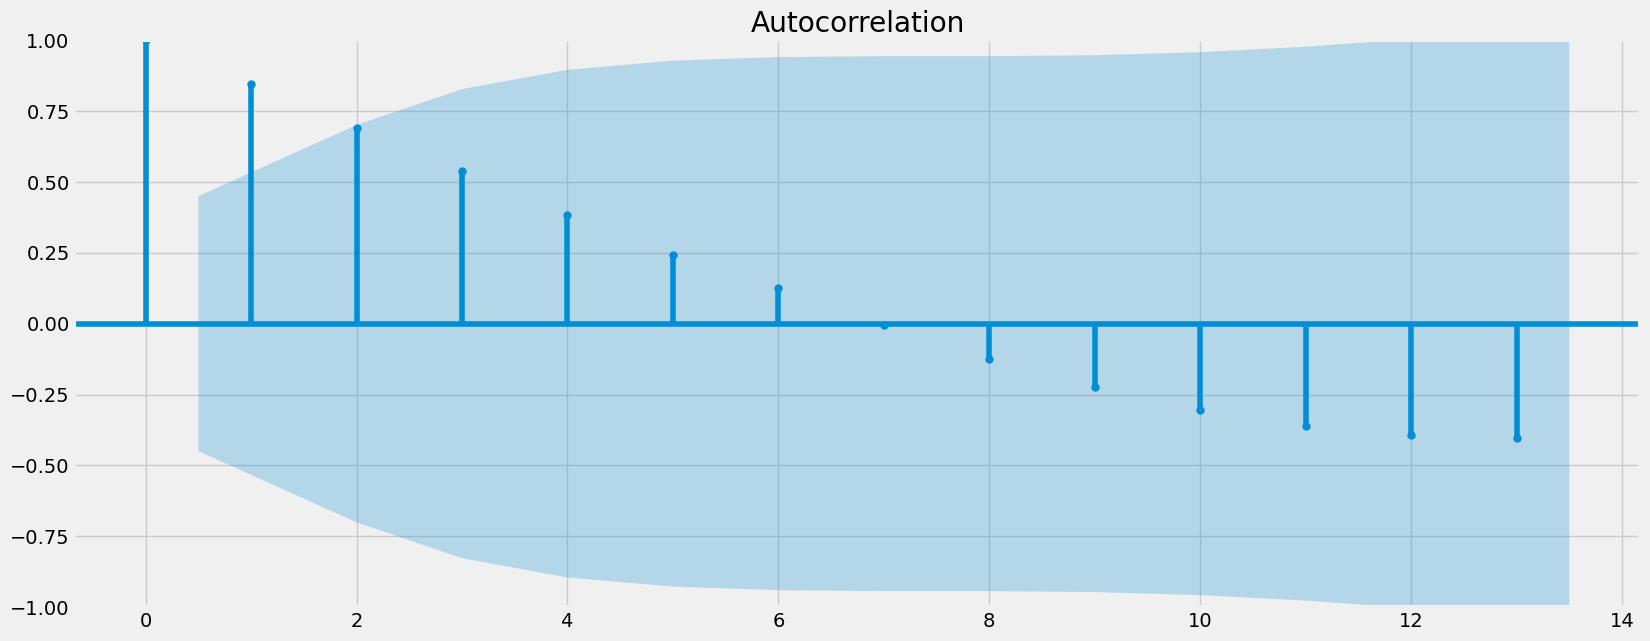

In [12]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()

Most of the lines on the chart are not autocorrelated, so the stationarity is not the strongest it can be, but still pretty good. 

4. Stationarizing the Data

In [13]:
data_diff = df - df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [14]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [15]:
data_diff.head()

,STD Cases
Year,
1997-01-01,43579.0
1998-01-01,100453.0
1999-01-01,55544.0
2000-01-01,44871.0
2001-01-01,75217.0


In [16]:
data_diff.columns

Index(['STD Cases'], dtype='object')

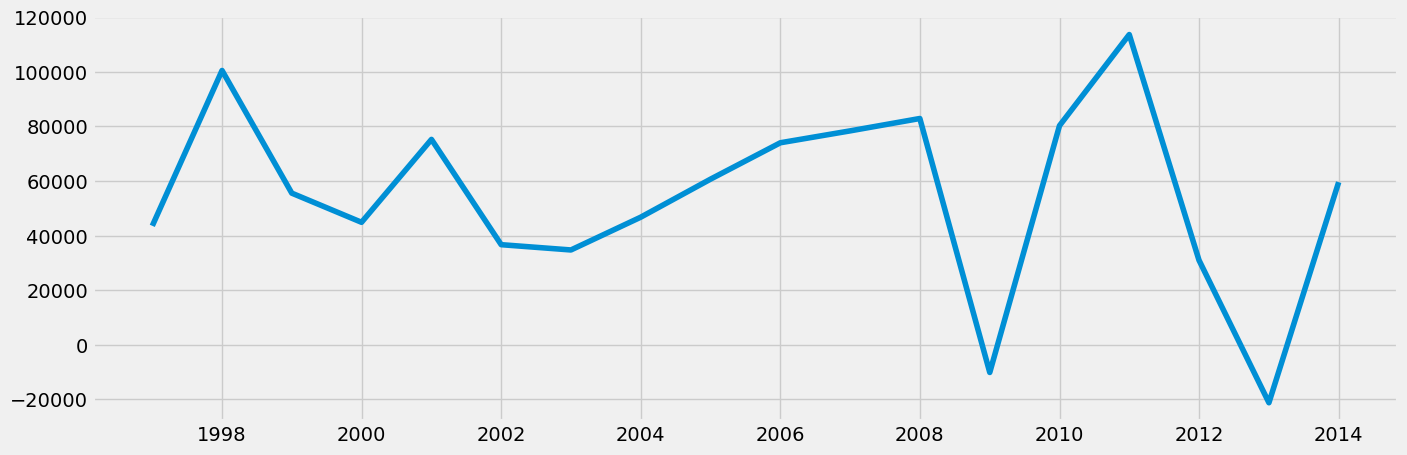

In [17]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [18]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.818214
p-value                         0.371457
Number of Lags Used             7.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


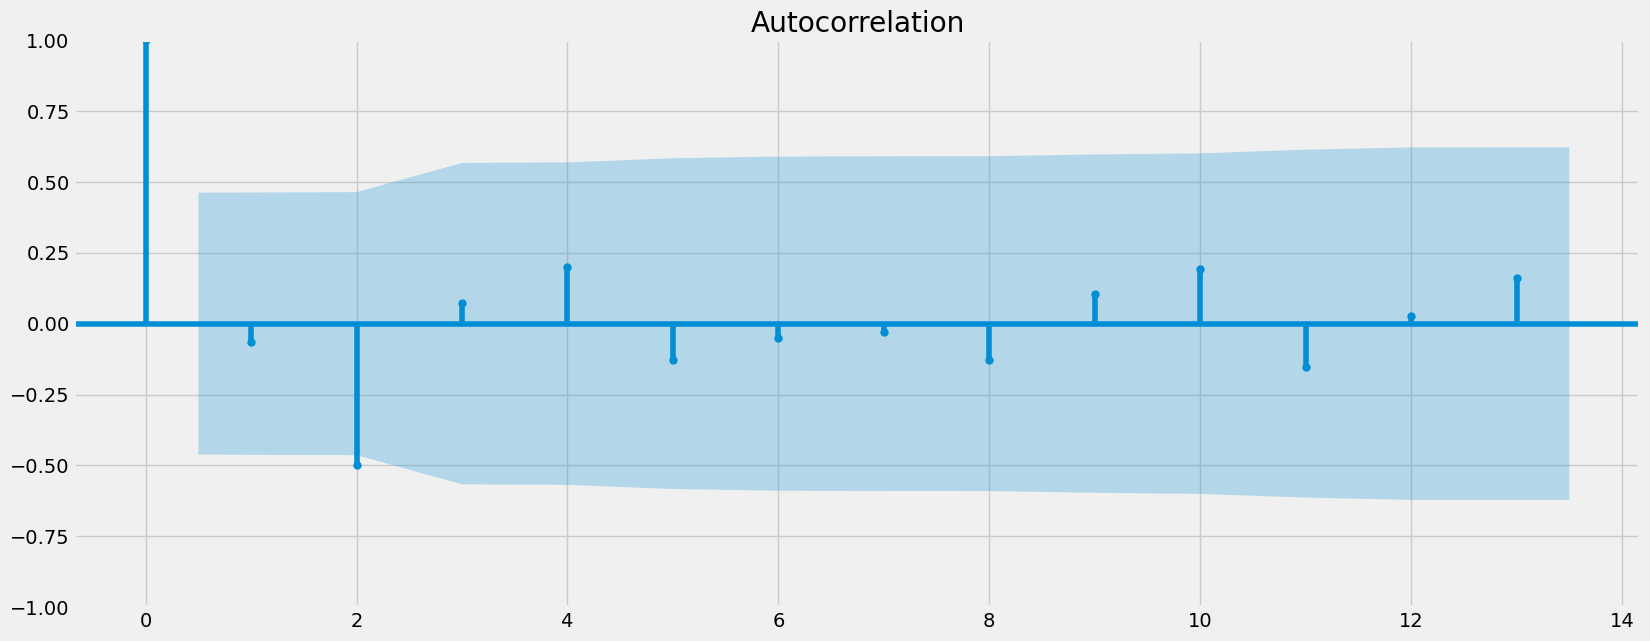

In [19]:
plot_acf(data_diff)
plt.show()

In [20]:
## I do not think my data needed this,but I wanted to try this out. This improved the signifance some with the 0-value, but still not at a good number.  There are still the same amount of autocorrectness. 

# 6.6 Time Series Forecasting in Python Bonus

This script contains the following:
1. Defining Your Parameters
2. Splitting the Data
3. Running and Fitting the Model
4. Iterating

1. Defining Your Parameters

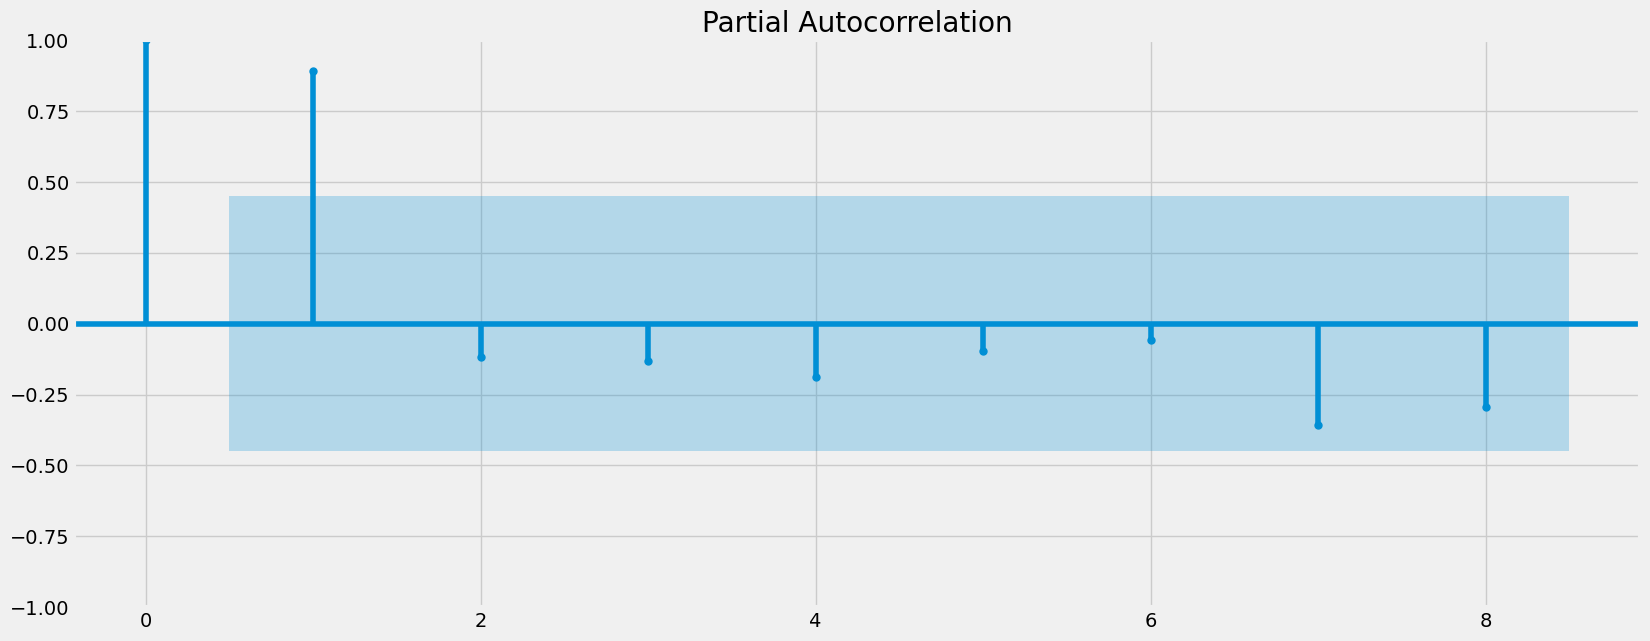

<Figure size 4500x4500 with 0 Axes>

In [21]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(df, lags = 8)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

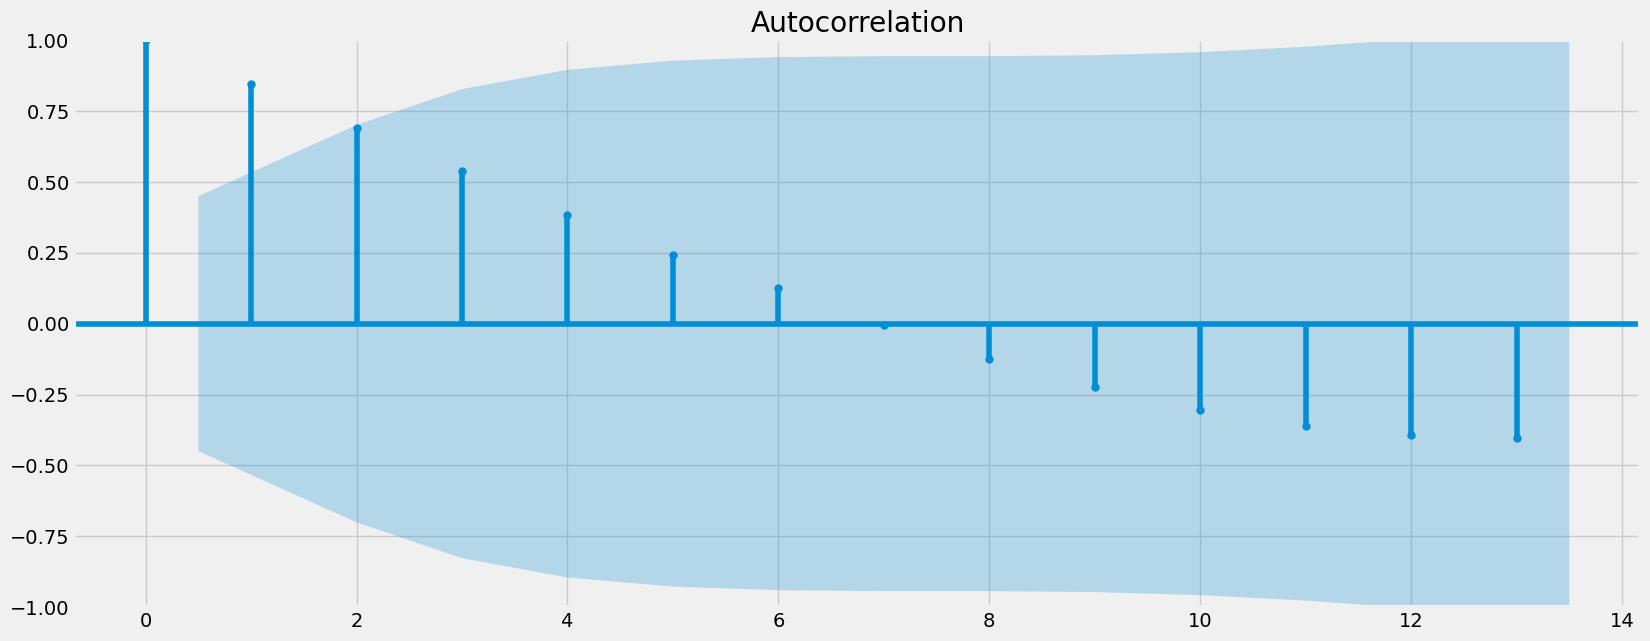

<Figure size 1500x100 with 0 Axes>

In [22]:
# Plot autocorrelations to determine parameter q

plot_acf(df)
plt.figure(figsize=(15,1), dpi=100)
plt.show()

2. Splitting the data

In [30]:
# Split the data

train = df['STD Cases'][:14]
test = df['STD Cases'][13:]

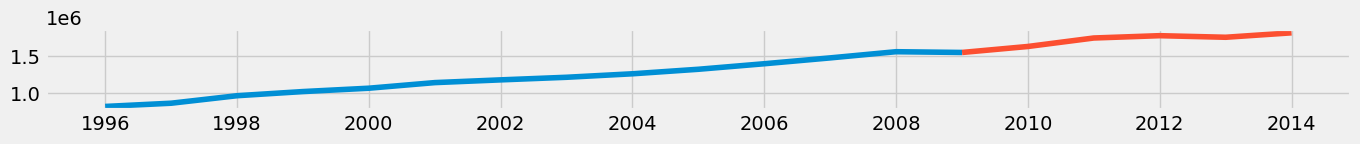

In [31]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,1), dpi=100)
plt.plot(train)
plt.plot(test)

In [32]:
test.shape

(6,)

3. Running and Fitting the Model

In [26]:
from statsmodels.tsa.api import ARIMA # Import the model you need

                               SARIMAX Results                                
Dep. Variable:              STD Cases   No. Observations:                   14
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -166.861
Date:                Sun, 30 Apr 2023   AIC                            347.722
Time:                        12:09:57   BIC                            352.195
Sample:                    01-01-1996   HQIC                           347.308
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.205e+06   1.42e+05      8.500      0.000    9.27e+05    1.48e+06
ar.L1          1.6910      2.786      0.607      0.544      -3.770       7.152
ar.L2         -0.4820      5.328     -0.090      0.9

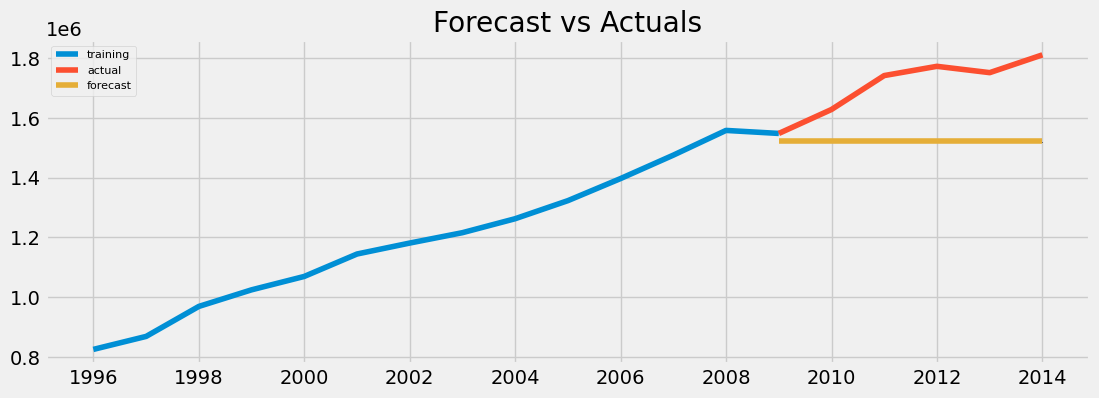

In [40]:
model = ARIMA(train, order=(3, 0, 2))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_results = fitted.forecast(6, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 8 is the shape of the test set
fc, se, conf = forecast_results[:3]

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)

# Get lower and upper confidence bounds
if isinstance(conf, float):  # check if conf is a float
    conf_df = pd.DataFrame({'0': conf, '1': conf}, index=test.index)
else:
    conf_df = conf
lower_series = pd.Series(conf_df.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf_df.iloc[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha= 0.5) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

4. Iterating

                               SARIMAX Results                                
Dep. Variable:              STD Cases   No. Observations:                   14
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -167.304
Date:                Sun, 30 Apr 2023   AIC                            346.609
Time:                        12:07:35   BIC                            350.443
Sample:                    01-01-1996   HQIC                           346.254
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.205e+06   1.15e+05     10.498      0.000     9.8e+05    1.43e+06
ar.L1          2.2121      0.853      2.594      0.009       0.541       3.883
ar.L2         -1.4796      1.707     -0.867      0.3

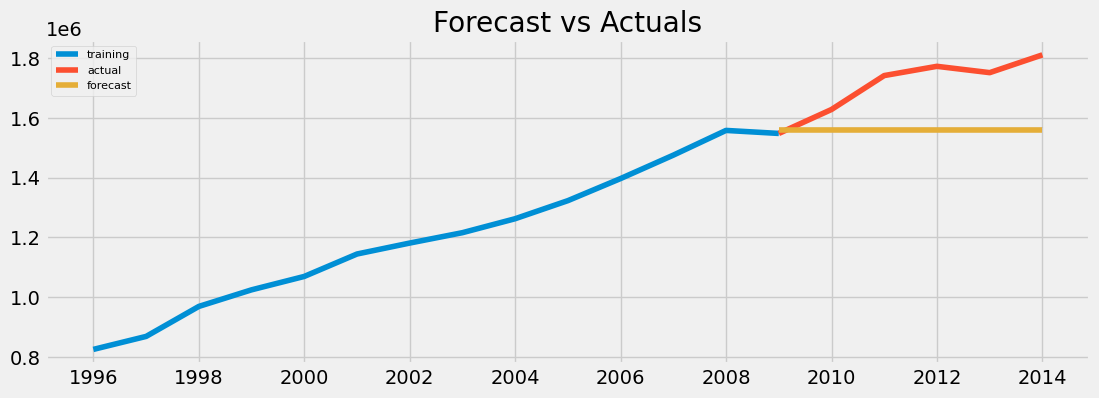

In [34]:
model = ARIMA(train, order=(3, 0, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
forecast_results = fitted.forecast(6, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set
fc, se, conf = forecast_results[:3]

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)

# Get lower and upper confidence bounds
if isinstance(conf, float):  # check if conf is a float
    conf_df = pd.DataFrame({'0': conf, '1': conf}, index=test.index)
else:
    conf_df = conf
lower_series = pd.Series(conf_df.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf_df.iloc[:, 1], index=test.index) # Upper bound of the confidence interval


# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                               SARIMAX Results                                
Dep. Variable:              STD Cases   No. Observations:                   14
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -147.794
Date:                Sun, 30 Apr 2023   AIC                            317.589
Time:                        12:07:49   BIC                            323.803
Sample:                    01-01-1996   HQIC                           316.311
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2448      3.727     -0.066      0.948      -7.550       7.061
ar.L2          0.0930      2.339      0.040      0.968      -4.492       4.678
ar.L3         -0.0614      3.176     -0.019      0.9

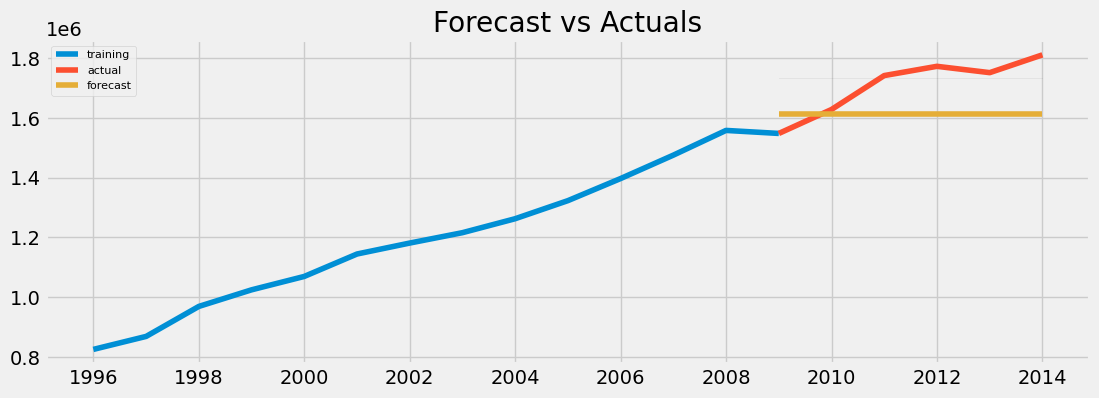

In [35]:
model = ARIMA(train, order=(5, 1, 5))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
forecast_results = fitted.forecast(6, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 41 is the shape of the test set
fc, se, conf = forecast_results[:3]

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)

# Get lower and upper confidence bounds
if isinstance(conf, float):  # check if conf is a float
    conf_df = pd.DataFrame({'0': conf, '1': conf}, index=test.index)
else:
    conf_df = conf
lower_series = pd.Series(conf_df.iloc[:, 0], index=test.index) # lower bound of the confidence interval
upper_series = pd.Series(conf_df.iloc[:, 1], index=test.index) # Upper bound of the confidence interval


# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#I think my data set was too small to make an accurate forecast. I amy try again with a larger data set for the bonus task. 